## Understanding ACF and PACF

> https://www.youtube.com/watch?v=DeORzP0go5I&t=18s

> https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook
---

We want to predict the avg price of salmon in the current month

$s_t$: avg price of salmon this month (march)

$s_{t-1}$: avg price of salmon prev month (feb)

$s_{t-2}$: avg price of salmon 2 months back (jan)

...

Key idea in TS:

Price of salmon this month will depend on price prev month, 2 mos back, 3 mos back and so on...

### ACF

![](https://imgur.com/FhLPpKc.png)


- price of salmon in J affects F
- price of salmon in F affects M
- price of salmon in J has an indirect effect on price in M through F
- price of salmon in J has a direct effect on price in M
    - maybe there is a food festival every 2 mos

__ACF includes all direct + indirect effects through all indtermediary time periods__

To find the correlation of price in current month to 2 mos back

we line up all data points (jan - mar), (feb - apr), ... and compute correlation (here pearsons)


![](https://imgur.com/2LMqVYm.png)

### PACF

We only care about __direct effect__ so s_(t-2) ---> s_t

One use case of using PACF is if we want to find out if the price of salmon 2 mos ago is a __good predictor__
for the price this month

- ACF is high might not be a sufficient eveidence as the high value might be because of indirect effects and not the direct effect


#### Computing PACF


Lets say we want to compute how much effect s_(t-2) has on s_t so k=2

- the first step is to write a regressive model

![](https://imgur.com/d8YQ3wb.png)

$\phi_{22}$ term will give us the __direct effect s_(t-2) has on s_t__ as the indirect effects are captured by the other coeffs

$\phi_{22}$  is the PACF for k=2


#### Interpret PACF

![](https://imgur.com/ZXT9p6g.png)

- we find PACF for k=1,2,3...
- red bars are error bands
    - consider anything within error bands are same as 0
    - 6,7 PACF have 0 PACF acc to error bands

So a good model might look like:

![](https://imgur.com/SyMXDKf.png)

> this type of model where we predict something based on past values of the thing is called an __Autoregressive Model__













In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [4]:
df_ice_cream = pd.read_csv("./data/ice_cream.csv")

In [5]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


This is data of montly ice cream sales from 1972 -> 2010

In [6]:
df_ice_cream = df_ice_cream.rename(columns={'DATE': 'date', 'IPN31152N': 'production'})
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [7]:
df_ice_cream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [8]:
df_ice_cream.date.min(), df_ice_cream.date.max() 

(Timestamp('1972-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [9]:
df_ice_cream.shape

(577, 2)

In [10]:
# set date as index
df_ice_cream = df_ice_cream.set_index('date')

In [17]:
# get data from 2010 onwards
df_ice_cream = df_ice_cream["2010-01-01":]

In [20]:
df_ice_cream.index.min(), df_ice_cream.index.max() 

(Timestamp('2010-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [22]:
df_ice_cream.sort_index()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


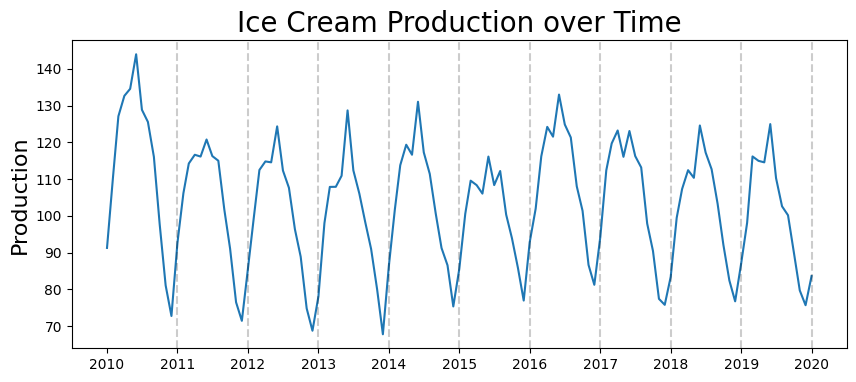

In [23]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
# line to separate the years
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

- middle of each year ~ summer ~ June - July is the peak
- near winter its low
- so it has strong seasonal component
- 2015 was low compared to other years

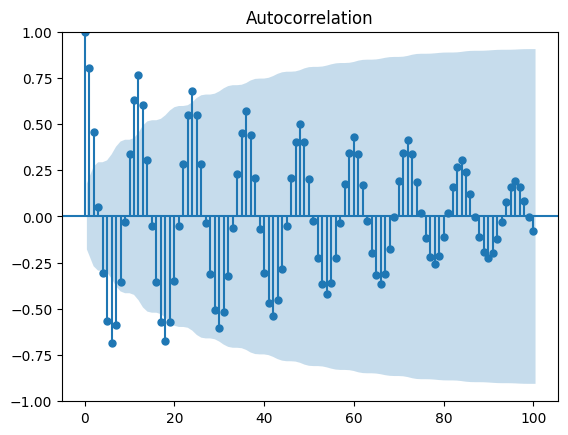

In [24]:
acf_plot = plot_acf(x=df_ice_cream.production, lags=100)

A decaying autocorrelation function (ACF) is a characteristic often seen in an autoregressive (AR) process. An autoregressive process is a type of time series model where the current value of the series depends linearly on its past values. In other words, the value of the series at a given time is a weighted sum of its previous values. The "autoregressive order," denoted as AR(p), specifies how many past values are used to predict the current value.

When the ACF decays exponentially or gradually as the lag increases, it suggests that the current value of the time series is highly correlated with its recent past values and less correlated with values further back in time. This is a characteristic of autoregressive processes, where the influence of past values on the current value decreases as the time gap (lag) increases.

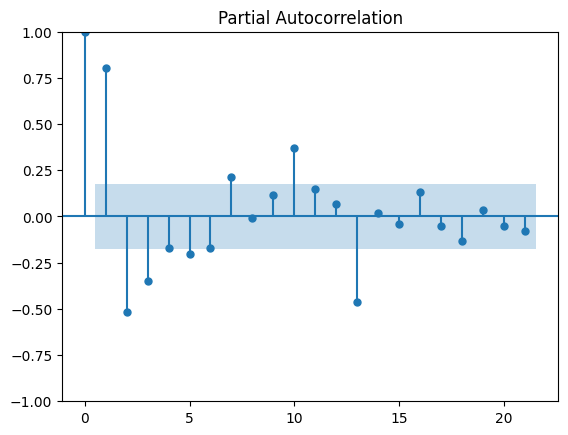

In [25]:
pacf_plot = plot_pacf(df_ice_cream.production)

Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

### On stock data

In [26]:
import yfinance as yf

In [27]:
#define the ticker symbol
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)

In [28]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [29]:
tickerDf = tickerDf[['Close']]

In [34]:
tickerDf = tickerDf.sort_index()

In [37]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.134644
2015-01-05 00:00:00-05:00,172.953659
2015-01-06 00:00:00-05:00,171.324677
2015-01-07 00:00:00-05:00,173.459534
2015-01-08 00:00:00-05:00,176.537598


In [35]:
tickerDf.shape

(1258, 1)

In [36]:
tickerDf.index.min(), tickerDf.index.max()

(Timestamp('2015-01-02 00:00:00-0500', tz='America/New_York'),
 Timestamp('2019-12-31 00:00:00-0500', tz='America/New_York'))

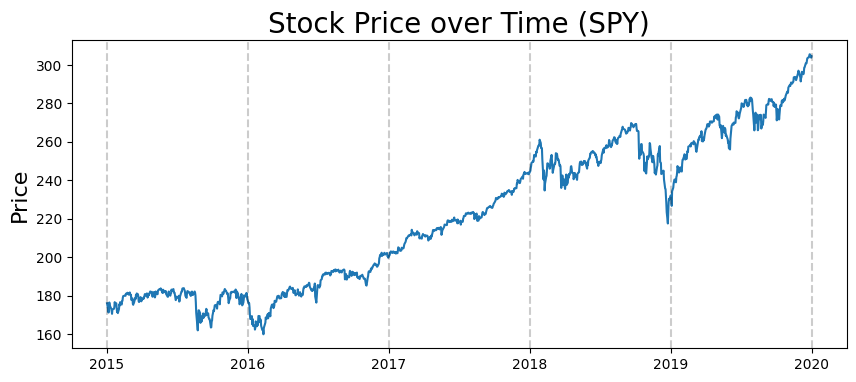

In [38]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Stationarity: take first difference of this series

In the context of time series analysis, "stationarity" refers to a fundamental property of a time series where statistical properties, such as mean, variance, and autocorrelation, remain constant over time. A stationary time series exhibits consistent behavior across different time periods and is often easier to analyze and model compared to non-stationary time series.


Yes, you can often get visual clues about the stationarity of a time series by plotting it and looking for certain patterns. While visual inspection is not a definitive test for stationarity, it can provide insights that might guide you in further analysis. Here are a few things to look for when plotting a time series to assess its stationarity:

1. **Trend:** A clear upward or downward trend in the data indicates non-stationarity. A stationary time series should have a relatively constant mean over time.

2. **Seasonality:** If the time series exhibits repeating patterns at fixed intervals (e.g., daily, monthly), it could indicate seasonality. Seasonality doesn't necessarily make a series non-stationary, but it's important to consider when modeling.

3. **Variance:** Look for changes in the variance over time. If the variance increases or decreases over time, it suggests non-constant variance, which can be an indicator of non-stationarity.

4. **Cycles:** If you observe cyclical patterns that aren't related to seasonality, it could indicate a longer-term non-stationary behavior, such as economic cycles.

5. **Randomness:** A stationary time series should appear relatively random around a constant mean, without any clear upward or downward movements.

To help you better understand, here's a breakdown of what you might see in plots of stationary and non-stationary time series:

**Stationary Time Series:**
- The plot doesn't show a clear trend (upward or downward).
- The mean and variance appear relatively constant across time.
- Autocorrelation patterns in the ACF plot decay quickly.

**Non-Stationary Time Series:**
- The plot shows a noticeable trend (upward or downward) over time.
- The mean and/or variance visibly change across time.
- Autocorrelation patterns in the ACF plot decay slowly or erratically.

However, keep in mind that visual inspection might not be sufficient to definitively determine stationarity, especially for subtle cases. To make a more rigorous assessment, you can use statistical tests specifically designed to test for stationarity, such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. These tests provide p-values that can help you quantify the likelihood of the time series being stationary or non-stationary.



In [39]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])


#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs


In [40]:
tickerDf

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,176.134644,-3.180984
2015-01-05 00:00:00-05:00,172.953659,-1.628983
2015-01-06 00:00:00-05:00,171.324677,2.134857
2015-01-07 00:00:00-05:00,173.459534,3.078064
2015-01-08 00:00:00-05:00,176.537598,-1.414688
...,...,...
2019-12-24 00:00:00-05:00,303.931671,1.617950
2019-12-26 00:00:00-05:00,305.549622,-0.075684
2019-12-27 00:00:00-05:00,305.473938,-1.684204


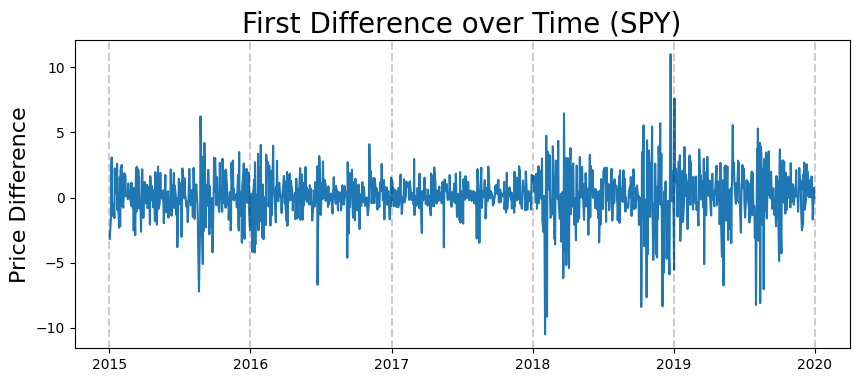

In [41]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

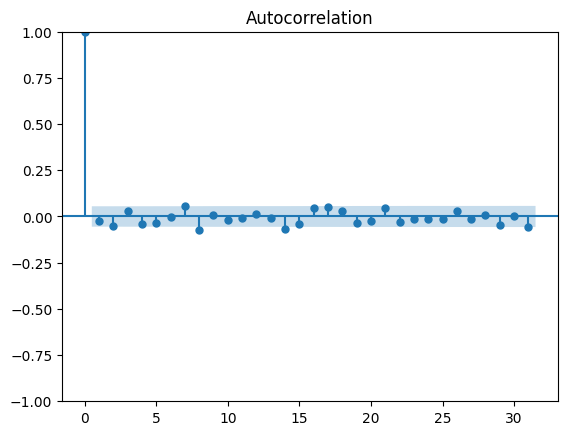

In [42]:
acf_plot = plot_acf(tickerDf.FirstDifference)


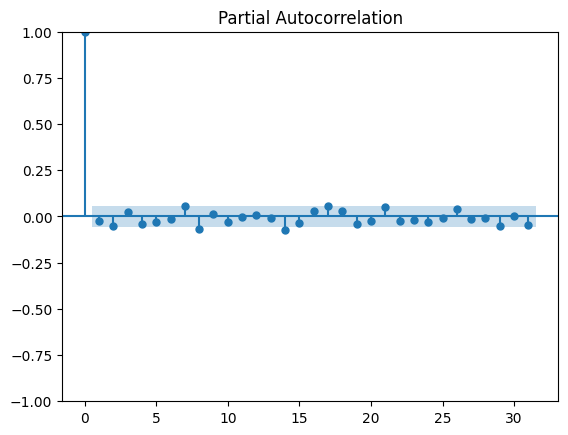

In [43]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)


- the fact that ACF, PACF give us no clear signal is an indication that using AR might not be sufficient